# Breast Cancer Wisconsin (Original) Data Set

Attribute Information:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

we can refer the below url for more details about the project 

https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

In [1]:
# lets start with data import and some exploratory data analysis. 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 



In [2]:
# create the data using the pandas librarry 


columns = ['Sample code number', 'Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

data = pd.read_csv('breast-cancer-wisconsin.data',names=columns)



In [3]:
# will check the head of the data 
data.head()


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Lets Do some Data Exploratory Analysis

In [4]:
data = data.replace(to_replace='?' , value=0)

In [5]:
data.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
# looks like sample code number is not relevant so we can drop that 

data = data.drop('Sample code number',axis=1)

In [7]:
# check the data type before performing any operations.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [8]:
data.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [9]:
#from sklearn.preprocessing import LabelEncoder

#encoder = LabelEncoder()

#data['Bare Nuclei'] = encoder.fit_transform(data['Bare Nuclei'])

data['Bare Nuclei'] = data['Bare Nuclei'].map(lambda x : int(x))
 

E:\Workspace\MachineLearning\Anaconda\Installation\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\Workspace\MachineLearning\Anaconda\Installation\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Workspace\MachineLearning\Anaconda\Installation\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
E:\Workspace\MachineLearning\Anaconda\Installation\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encounte

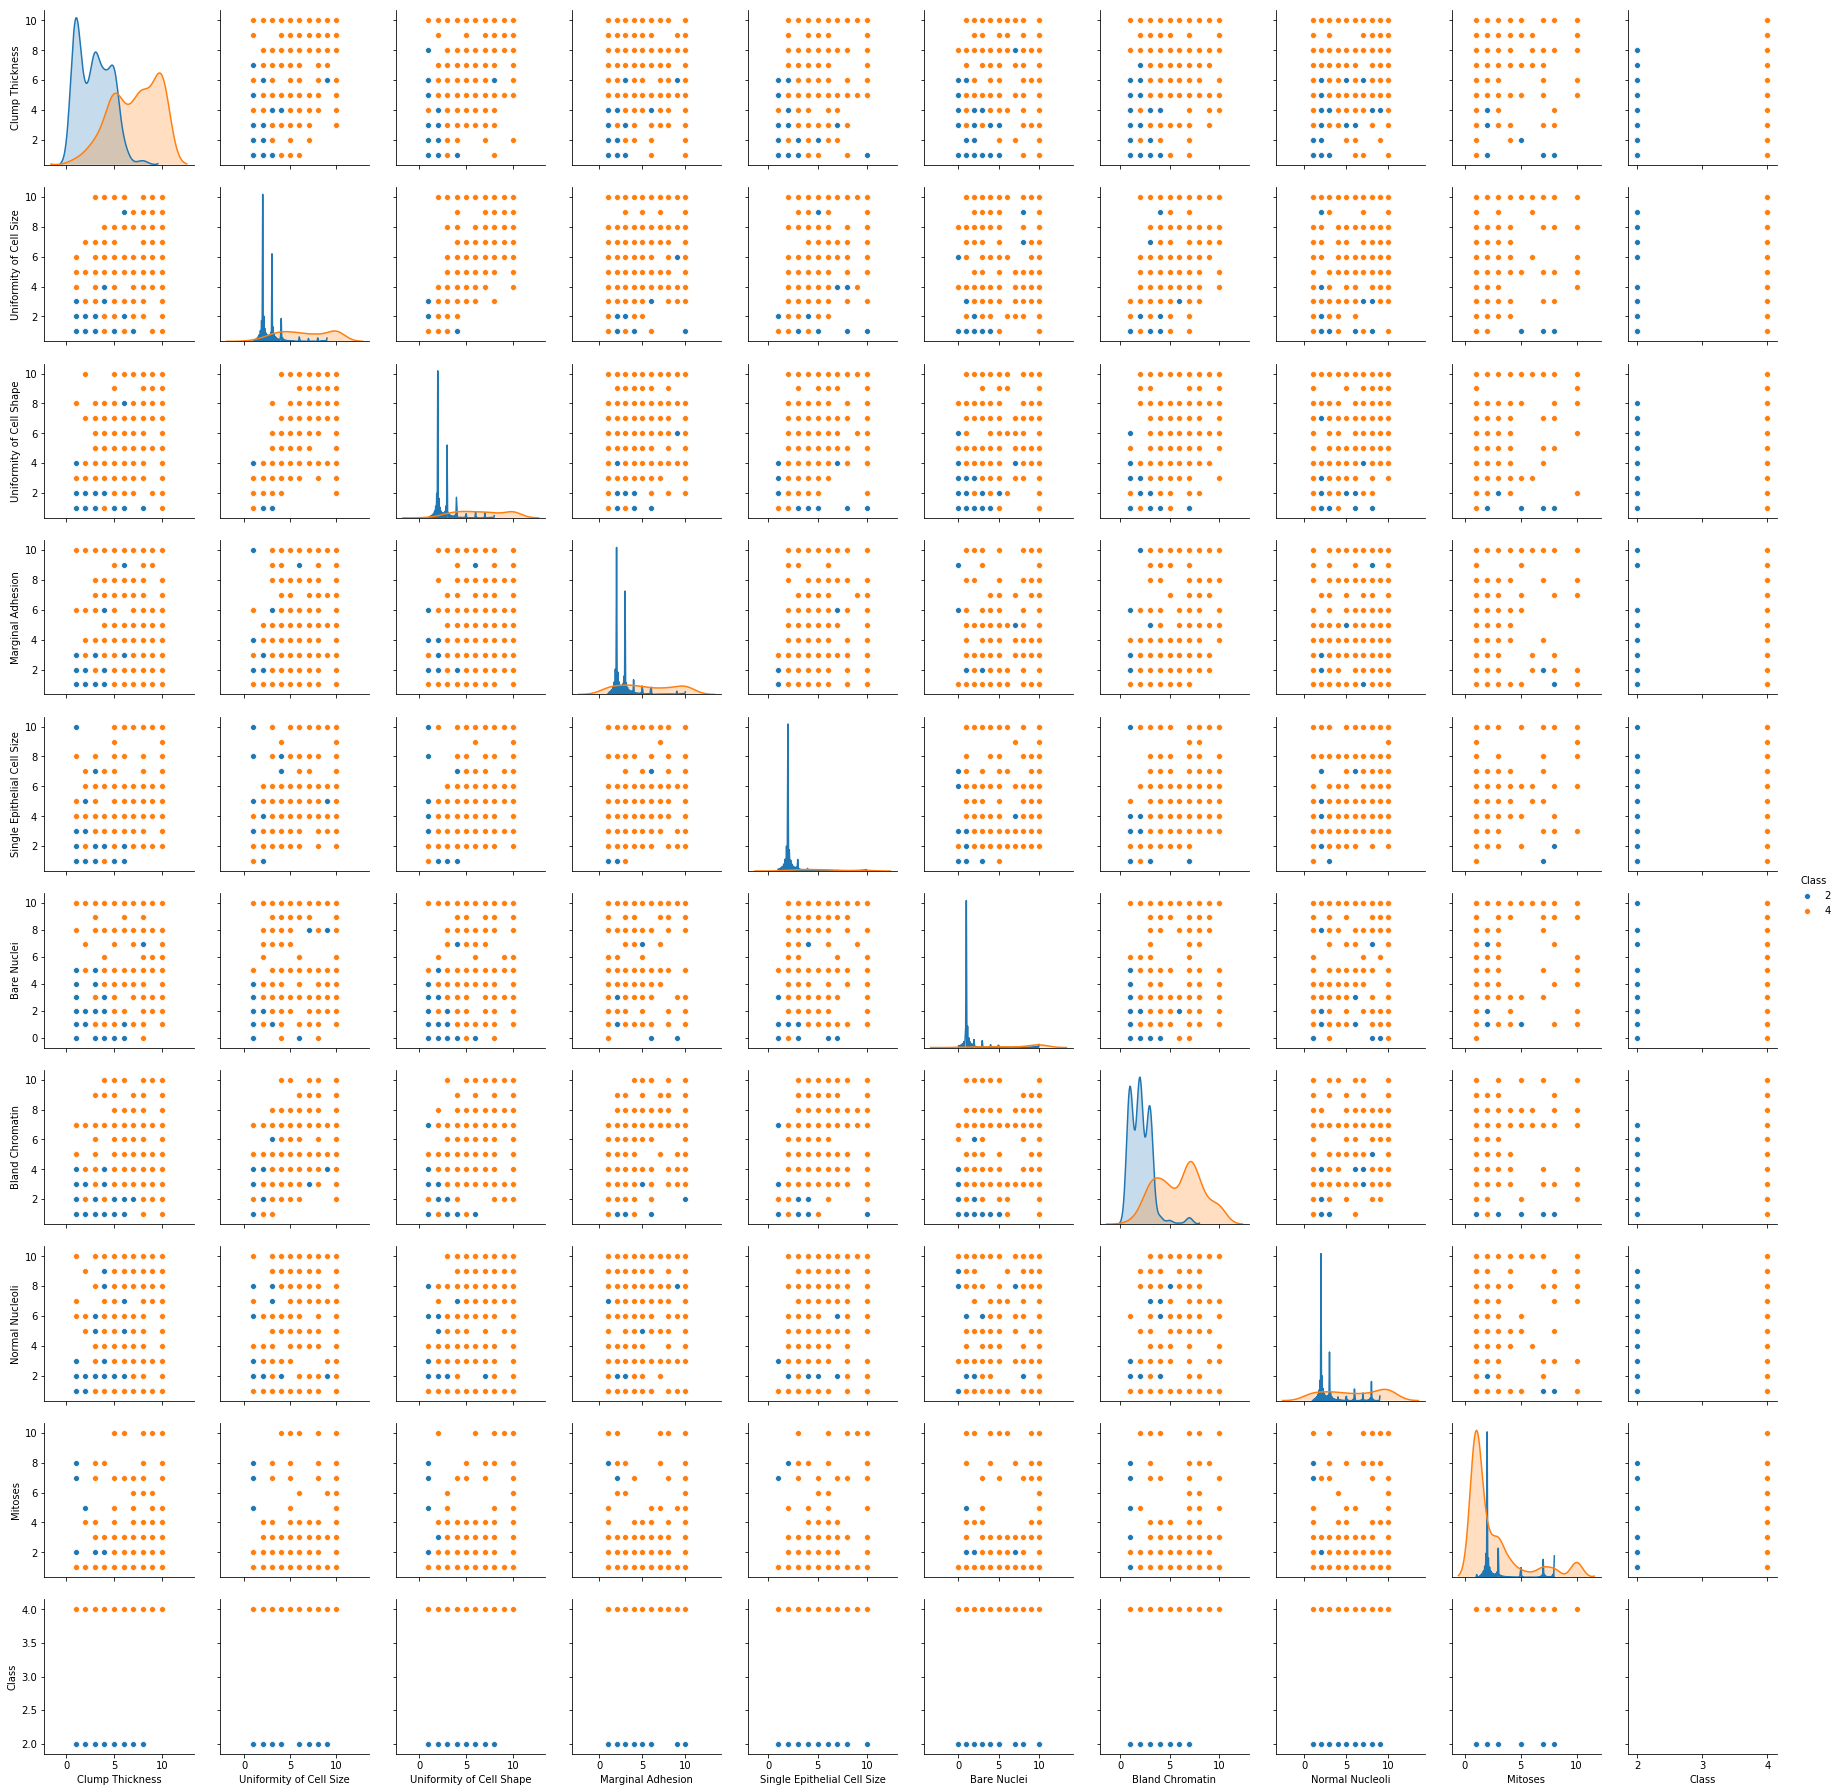

In [10]:
sns.pairplot(data,hue='Class')

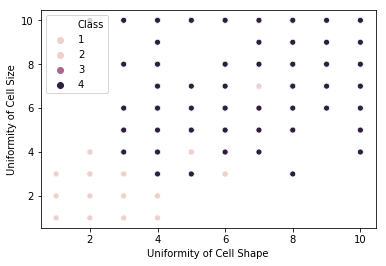

In [11]:
sns.scatterplot(y='Uniformity of Cell Size', x='Uniformity of Cell Shape', data=data,hue='Class')

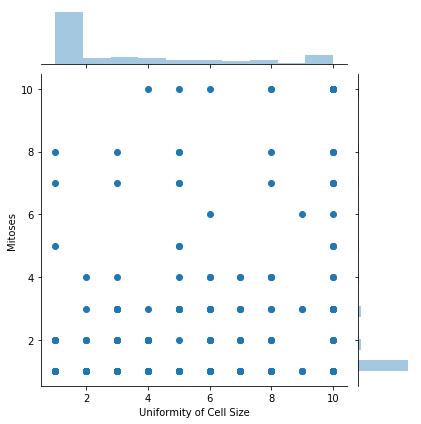

In [12]:
sns.jointplot(x='Uniformity of Cell Size',y='Mitoses',data=data)

In [13]:
X=data.drop('Class',axis=1)
y=data['Class']

In [14]:
# We will create the model and check the different score, 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train, y_train)

E:\Workspace\MachineLearning\Anaconda\Installation\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred = model.predict(X_test)

In [19]:
# prind different scores and check the data 

print('R2 score : ' , r2_score(y_test, y_pred))
print('Accuracy score ', accuracy_score(y_test,y_pred))
print('Çonfusion matrix', confusion_matrix(y_test,y_pred))


R2 score :  0.8465713391086526
Accuracy score  0.9666666666666667
Çonfusion matrix [[141   2]
 [  5  62]]


In [20]:
from sklearn.svm import SVC


In [21]:
svc_model = SVC()

In [22]:
svc_model.fit(X_train,y_train)

E:\Workspace\MachineLearning\Anaconda\Installation\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
svc_y_pred = svc_model.predict(X_test)

In [24]:
# prind different scores and check the data 

print('R2 score : ' , r2_score(y_test, svc_y_pred))
print('Accuracy score ', accuracy_score(y_test,svc_y_pred))
print('Çonfusion matrix', confusion_matrix(y_test,svc_y_pred))

R2 score :  0.8465713391086526
Accuracy score  0.9666666666666667
Çonfusion matrix [[136   7]
 [  0  67]]
